In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import file
df = pd.read_csv('all_df.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 74 columns):
Unnamed: 0                            393 non-null int64
Date                                  393 non-null object
Revenue                               393 non-null float64
Users                                 393 non-null float64
Sessions                              393 non-null float64
Transactions                          393 non-null float64
Quantity                              393 non-null float64
Bounces                               393 non-null float64
Pages / Session                       393 non-null float64
Avg. Session Duration                 393 non-null object
Session Duration                      393 non-null object
Avg. Session Duration Seconds         393 non-null float64
('Users', '(Other)')                  393 non-null float64
('Users', 'Affiliate')                393 non-null float64
('Users', 'CSE')                      393 non-null float64
('Users', 'Dire

**1. Can you count something interesting?**

In [44]:
import numpy as np

#Create a new column with 1 if they reached or exceeded goal and 0 if they did not
df['Goal Reached'] = np.where(df['Revenue'] >= df['Daily Revenue Demand Plan'], 1, 0)

print(df['Goal Reached'].head())

0    0
1    0
2    0
3    0
4    0
Name: Goal Reached, dtype: int32


In [51]:
#Count the number of days they reached or exceeded goal and the number of days they did not
gr_df = df['Goal Reached'].value_counts()
days_not_reached = float(gr_df[0])
days_reached = float(gr_df[1])
days = float(len(df))
per_not_reach = float(days_not_reached/days)
per_reach = float(days_reached/days)

print'Number of Days Goal Not Reached:',gr_df[0],"; Number of Days Goal Reached:", gr_df[1]
print'Percentage of Days Goal Not Reached:', "{:.2%}".format(per_not_reach)
print'Percentage of Days Goal Reached:', "{:.2%}".format(per_reach)

Number of Days Goal Not Reached: 267 ; Number of Days Goal Reached: 126
Percentage of Days Goal Not Reached: 67.94%
Percentage of Days Goal Reached: 32.06%


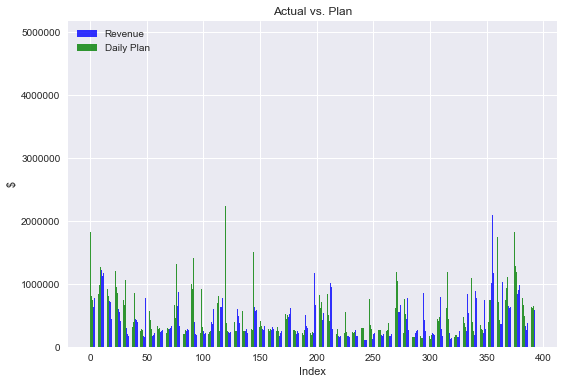

In [105]:
#Side by side bar chart to compare revenue to plan

# data to plot
n_days = len(df)
daily_revenue = df['Revenue']
daily_plan = df['Daily Revenue Demand Plan']
 
#create plot
fig, ax = plt.subplots()
index = np.arange(n_days)
bar_width = 0.35
opacity = 0.8
 
rects3 = plt.bar(index, daily_revenue, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Revenue')
 
rects4 = plt.bar(index + bar_width, daily_plan, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Daily Plan')
 
plt.xlabel('Index')
plt.ylabel('$')
plt.title('Actual vs. Plan')
plt.legend()

plt.tight_layout()
plt.show()


In [129]:
#Percent to goal

df['% to Goal'] = daily_revenue/daily_plan

#Create a new column with 1 if % to goal was less than 50% and 0 if not
df['% to Goal < 50%'] = np.where(df['% to Goal'] < 0.5, 1, 0)

#Create a new column with 1 if % to goal was between 50%(including 50%) and 75% and 0 if not
df['% to Goal btwn 50% & 75%'] = np.where(np.logical_and(df['% to Goal'] >= 0.50, df['% to Goal'] < 0.75), 1, 0)

#Create a new column with 1 if % to goal was between 75%(including 75%) and 100% and 0 if not
df['% to Goal btwn 75% & 100%'] = np.where(np.logical_and(df['% to Goal'] >= 0.75, df['% to Goal'] < 1), 1, 0)

#Create a new column with 1 if % to goal was between 100%(including 100%) and 125% and 0 if not
df['% to Goal btwn 100% & 125%'] = np.where(np.logical_and(df['% to Goal'] >= 1, df['% to Goal'] < 1.25), 1, 0)

#Create a new column with 1 if % to goal was greater than 125%(including 125%) and 0 if not
df['% to Goal >= 125%'] = np.where(df['% to Goal'] >= 1.25, 1, 0)

#Value Counts
lessthan50 = df['% to Goal < 50%'].value_counts()
btwn50_75 = df['% to Goal btwn 50% & 75%'].value_counts()
btwn75_100 = df['% to Goal btwn 75% & 100%'].value_counts()
btwn100_125 = df['% to Goal btwn 100% & 125%'].value_counts()
greaterthanorequalto125 = df['% to Goal >= 125%'].value_counts()

print'Number of Days Less Than 50% to Goal:',lessthan50[1], 'Percentage of Days:', "{:.2%}".format(lessthan50[1]/days)
print'Number of Days Between 50% and 75% to Goal:',btwn50_75[1], 'Percentage of Days:', "{:.2%}".format(btwn50_75[1]/days)
print'Number of Days Between 75% and 100% to Goal:',btwn75_100[1], 'Percentage of Days:', "{:.2%}".format(btwn75_100[1]/days)
print'Number of Days Between 100% and 125% to Goal:',btwn100_125[1], 'Percentage of Days:', "{:.2%}".format(btwn100_125[1]/days)
print'Number of Days Greater Than or Equal to 125% to Goal:',greaterthanorequalto125[1], 'Percentage of Days:', "{:.2%}".format(greaterthanorequalto125[1]/days)

Number of Days Less Than 50% to Goal: 19 Percentage of Days: 4.83%
Number of Days Between 50% and 75% to Goal: 101 Percentage of Days: 25.70%
Number of Days Between 75% and 100% to Goal: 147 Percentage of Days: 37.40%
Number of Days Between 100% and 125% to Goal: 72 Percentage of Days: 18.32%
Number of Days Greater Than or Equal to 125% to Goal: 54 Percentage of Days: 13.74%


**2. Can you find some trends (high, low, increase, decrease, anomalies)?**

In [52]:
#Create columns for portions of the date (year, month, day, year-month)
def getMonth(s):
  return s.split("-")[1]

def getYear(s):
  return s.split("-")[0]

def getDay(s):
  return s.split("-")[2]

def getYearMonth(s):
  return s.split("-")[0]+"-"+s.split("-")[1]

df['year']= df['Date'].apply(lambda x: getYear(x))
df['month']= df['Date'].apply(lambda x: getMonth(x))
df['day']= df['Date'].apply(lambda x: getDay(x))
df['YearMonth']= df['Date'].apply(lambda x: getYearMonth(x))

print(df.head())

   Unnamed: 0        Date     Revenue     Users  Sessions  Transactions  \
0           0  2016-12-04  1221370.25  306549.0  379353.0        7667.0   
1           1  2016-12-05   704274.10  233431.0  281685.0        5025.0   
2           2  2016-12-06   619297.48  282736.0  345140.0        4597.0   
3           3  2016-12-07   636135.35  259674.0  321574.0        5004.0   
4           4  2016-12-08   777424.30  324932.0  404220.0        6542.0   

   Quantity   Bounces  Pages / Session Avg. Session Duration    ...      \
0   10094.0  119198.0             4.36               0:03:30    ...       
1    7252.0   95546.0             4.24               0:03:26    ...       
2    6169.0  139158.0             3.72               0:02:59    ...       
3    6776.0  121949.0             4.01               0:03:15    ...       
4    9046.0  173149.0             3.82               0:03:05    ...       

  ('Spend', 'CSE')  ('Spend', 'Display')  ('Spend', 'PLA')  \
0          1071.68               818

In [60]:
#Create a new dataframe with just the sum of revenue by device by Month/Year
df1 = df.groupby(df['YearMonth']).sum()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2016-12 to 2018-01
Data columns (total 70 columns):
Unnamed: 0                            14 non-null int64
Revenue                               14 non-null float64
Users                                 14 non-null float64
Sessions                              14 non-null float64
Transactions                          14 non-null float64
Quantity                              14 non-null float64
Bounces                               14 non-null float64
Pages / Session                       14 non-null float64
Avg. Session Duration Seconds         14 non-null float64
('Users', '(Other)')                  14 non-null float64
('Users', 'Affiliate')                14 non-null float64
('Users', 'CSE')                      14 non-null float64
('Users', 'Direct')                   14 non-null float64
('Users', 'Display')                  14 non-null float64
('Users', 'Email')                    14 non-null float64
('Users', 'Organic Sear

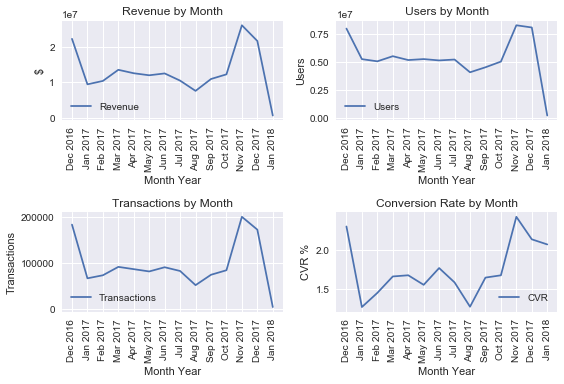

In [79]:
n_groups_df1 = len(df1)
index_df1 = np.arange(n_groups_df1)
labels = ('Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018')
revenue = df1[df1.columns[1]]
users = df1[df1.columns[2]]
transactions = df1[df1.columns[4]]
cvr = transactions/users * 100

_ = plt.subplot(2, 2, 1)
_ = plt.plot(index_df1, revenue, label= 'Revenue')
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 2)
_ = plt.plot(index_df1, users, label = 'Users')
plt.xlabel('Month Year')
plt.ylabel('Users')
plt.title('Users by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 3)
_ = plt.plot(index_df1, transactions, label = 'Transactions')
plt.xlabel('Month Year')
plt.ylabel('Transactions')
plt.title('Transactions by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 4)
_ = plt.plot(index_df1, cvr, label = 'CVR')
plt.xlabel('Month Year')
plt.ylabel('CVR %')
plt.title('Conversion Rate by Month')
plt.xticks(index_df1, labels, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

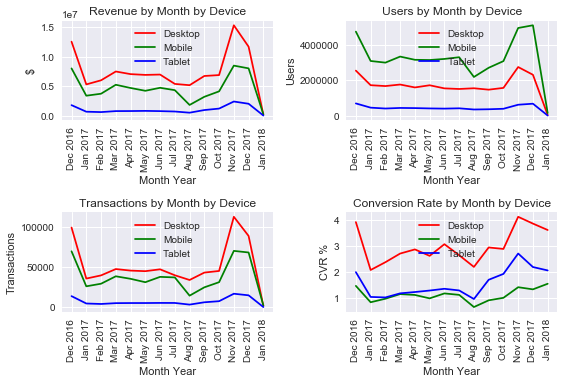

In [86]:
n_groups = len(df1)
index = np.arange(n_groups)
d_label = 'Desktop'
m_label = 'Mobile'
t_label = 'Tablet'
d_color = 'r'
m_color = 'g'
t_color = 'b'

revenue_desktop = df1[df1.columns[51]]
revenue_mobile = df1[df1.columns[52]]
revenue_tablet = df1[df1.columns[53]]

users_desktop = df1[df1.columns[48]]
users_mobile = df1[df1.columns[49]]
users_tablet = df1[df1.columns[50]]

trans_desktop = df1[df1.columns[54]]
trans_mobile = df1[df1.columns[55]]
trans_tablet = df1[df1.columns[56]]

cvr_desktop = trans_desktop/users_desktop * 100
cvr_mobile = trans_mobile/users_mobile * 100
cvr_tablet = trans_tablet/users_tablet * 100

_ = plt.subplot(2, 2, 1)
_ = plt.plot(index, revenue_desktop, color= d_color, label= d_label)
_ = plt.plot(index, revenue_mobile, color= m_color, label= m_label)
_ = plt.plot(index, revenue_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 2)
_ = plt.plot(index, users_desktop, color= d_color, label= d_label)
_ = plt.plot(index, users_mobile, color= m_color, label= m_label)
_ = plt.plot(index, users_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('Users')
plt.title('Users by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 3)
_ = plt.plot(index, trans_desktop, color= d_color, label= d_label)
_ = plt.plot(index, trans_mobile, color= m_color, label= m_label)
_ = plt.plot(index, trans_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('Transactions')
plt.title('Transactions by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

_ = plt.subplot(2, 2, 4)
_ = plt.plot(index, cvr_desktop, color= d_color, label= d_label)
_ = plt.plot(index, cvr_mobile, color= m_color, label= m_label)
_ = plt.plot(index, cvr_tablet, color= t_color, label= t_label)
plt.xlabel('Month Year')
plt.ylabel('CVR %')
plt.title('Conversion Rate by Month by Device')
plt.xticks(index, labels, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

**3. Can you make a bar plot or a histogram?**

In [87]:
#Create a new dataframe with just the sum of revenue and sum of plan by Month/Year
df2 = df.groupby(df['YearMonth'])['Revenue','Daily Revenue Demand Plan'].sum()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2016-12 to 2018-01
Data columns (total 2 columns):
Revenue                      14 non-null float64
Daily Revenue Demand Plan    14 non-null int64
dtypes: float64(1), int64(1)
memory usage: 336.0+ bytes
None


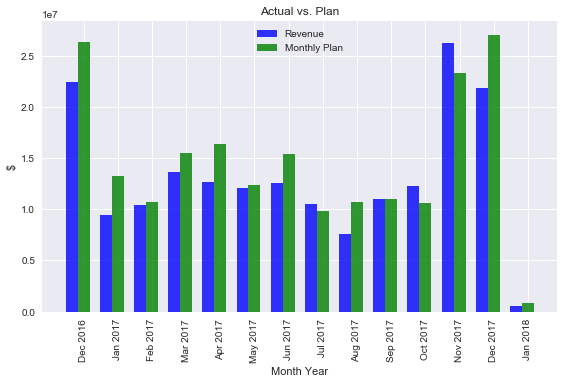

In [130]:
#Side by side bar chart to compare revenue to plan

# data to plot
n_groups = len(df2)
revenue = df2['Revenue']
monthly_plan = df2['Daily Revenue Demand Plan']
 
#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, revenue, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Revenue')
 
rects2 = plt.bar(index + bar_width, monthly_plan, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Monthly Plan')
 
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Actual vs. Plan')
plt.xticks(index + bar_width, labels, rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()


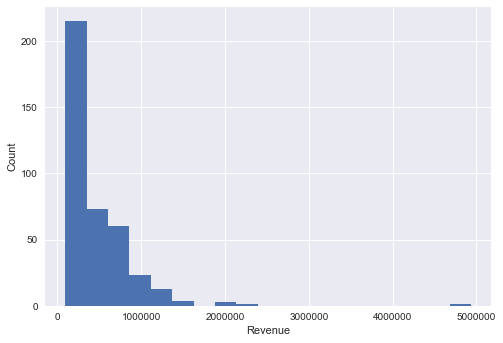

In [28]:
#Calculate the number of bins.

n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['Revenue'], bins= n_bins)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')

plt.show()

**4. Can you compare two related quantities?**

0      -608629.75
1      -111316.90
2      -125445.52
3      -300361.65
4      -338485.70
5      -158320.95
6       -54147.45
7       -37202.05
8      -125649.50
9      -346335.70
10     -753845.40
11     -251555.19
12      -15574.35
13      120547.40
14      278707.00
15      141323.35
16      149961.90
17      -59090.48
18       50574.12
19      -52956.05
20      -52031.75
21      -66781.09
22     -402798.10
23     -213822.30
24     -283083.10
25      -24784.00
26      -60203.07
27     -239789.35
28     -195914.50
29     -229026.40
          ...    
363    -130267.77
364    -796335.63
365     -65651.15
366    -268068.15
367    -143726.11
368    -400788.91
369    -308654.91
370    -196970.55
371    -209765.33
372    -251054.81
373    -541144.77
374   -1155757.51
375    -330955.29
376    -302330.95
377    -102550.86
378     -95955.06
379      65675.82
380      12242.03
381     -94697.67
382     -24012.09
383    -118086.05
384    -113161.51
385    -271770.55
386    -829806.66
387     51

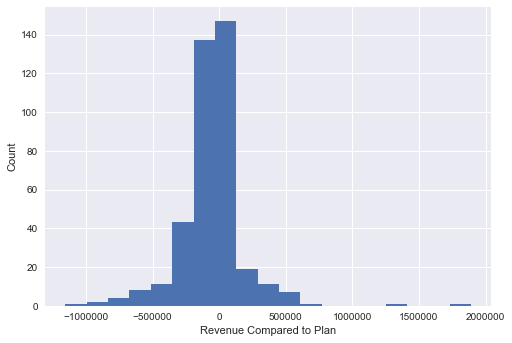

In [29]:
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']
print(df['Rev Compared to Plan'])

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['Rev Compared to Plan'], bins= n_bins)
_ = plt.xlabel('Revenue Compared to Plan')
_ = plt.ylabel('Count')

plt.show()

**5. Can you make a scatterplot?**

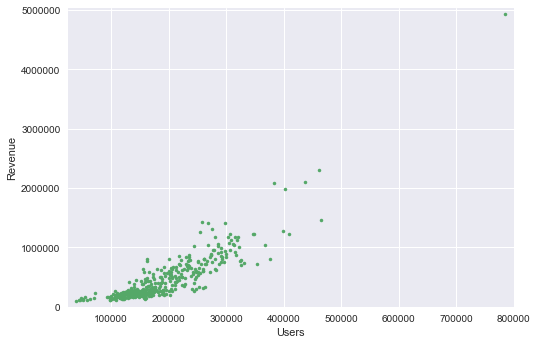

In [33]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')

plt.show()

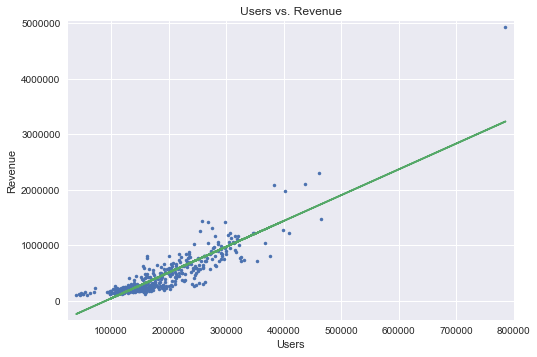

In [131]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
m, b = np.polyfit(df['Users'], df['Revenue'], 1)

_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Users'], m*df['Users'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')
_ = plt.title('Users vs. Revenue')

plt.show()

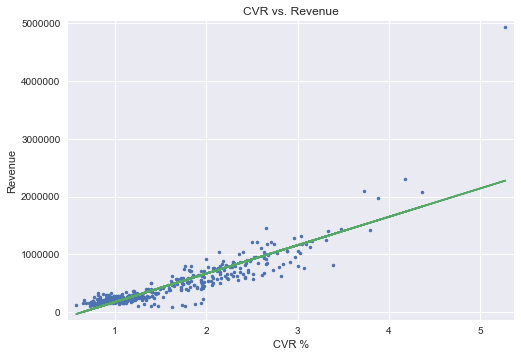

In [136]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
cvr_daily = df['Transactions']/df['Users'] * 100
revenue_daily = df['Revenue']

m, b = np.polyfit(cvr_daily, revenue_daily, 1)

_ = plt.plot(cvr_daily, revenue_daily, marker = '.', linestyle = 'none')
_ = plt.plot(cvr_daily, m*cvr_daily + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('CVR %')
_ = plt.ylabel('Revenue')
_ = plt.title('CVR vs. Revenue')

plt.show()

**6. Can you make a time-series plot?**

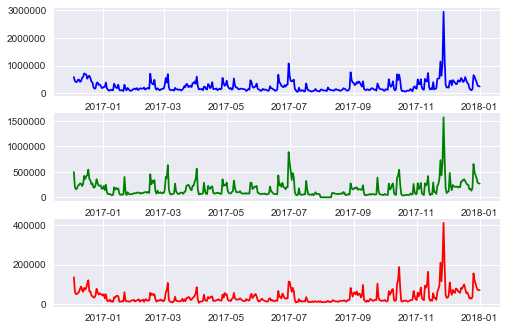

In [39]:
#Create three separate graphs, one for each device over time

x = pd.to_datetime(df['Date'], format='%Y-%m-%d')
revenue_desktop = df[df.columns[27]]
revenue_mobile = df[df.columns[28]]
revenue_tablet = df[df.columns[29]]

_ = plt.subplot(3, 1, 1)
_ = plt.plot(x, revenue_desktop, color='b', label = 'Desktop Revenue')
_ = plt.subplot(3, 1, 2)
_ = plt.plot(x, revenue_mobile, color='g', label = 'Mobile Revenue')
_ = plt.subplot(3, 1, 3)
_ = plt.plot(x, revenue_tablet, color='r', label = 'Tablet Revenue')

plt.show()



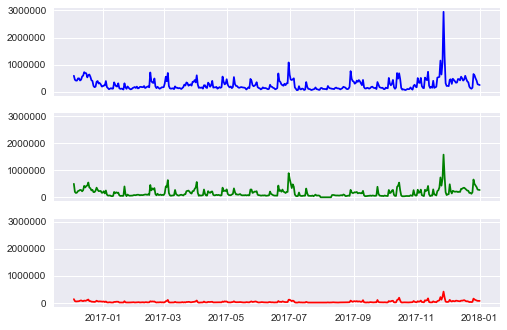

In [41]:
#Create, but have the same x, y axis for all three to illustrate the differences more easily.
x = pd.to_datetime(df['Date'], format='%Y-%m-%d')
revenue_desktop = df[df.columns[27]]
revenue_mobile = df[df.columns[28]]
revenue_tablet = df[df.columns[29]]

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, revenue_desktop, color='b', label = 'Desktop Revenue')
ax2.plot(x, revenue_mobile, color='g', label = 'Mobile Revenue')
ax3.plot(x, revenue_tablet, color='r', label = 'Tablet Revenue')

plt.show()


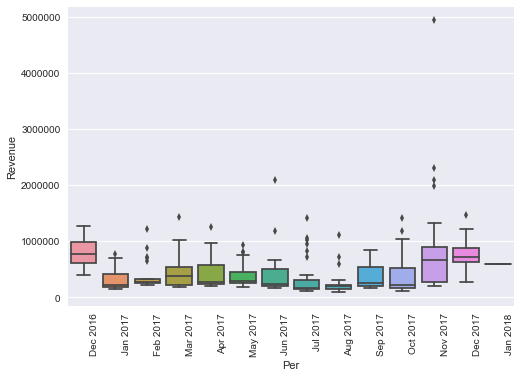

In [139]:
#Create a boxplot by month/year
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Per'] = pd.DatetimeIndex(df['Date']).to_period('M')

sns.boxplot(x='Per', y='Revenue', data=df)
plt.xticks(index + bar_width, labels, rotation=90)
#sns.swarmplot(x='Per', y='Revenue', data=df, color="0.25")
plt.show()

**Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis that you'd like to investigate further? What other questions do they lead you to ask?**

* Two-thirds of the days the client has not met their revenue plan. 
* August 2017 was the lowest revenue month.
* Every month, the device that drove the most revenue was desktop, with mobile second and tablet a distant third.
* October 2017 and November 2017 are the only two months out of the year that they client has exceeded the monthly plan (the sum of the daily plans for the month). Note: This client utilizes a fiscal calendar however, which was not used for these monthly sums.
* The histogram illustrates that just over nearly all of the 359 data points have revenue under $1,000,000
* In both the histogram and the scatter plot it's easy to see that there appears to be an outlier. When you identify the date of this datapoint you discover that this is Black Friday which for retailers like this client is typically an outlier and the highest revenue day of the year.
* Desktop and mobile revenue appear to follow a similar pattern, even though mobile is below desktop. Tablet however, doesn't appear to have the same high peaks that the other two do.
* The boxplot heps to highlight that December 2016, November 2017 are the two strong months out of the year with the mean for both those months much higher than any other month. March also appears to have a higher mean revenue than any other month.
* The scatterplot does indicate a strong positive correlation between Users (web traffic) and revenue. The more Users on site, the higher revenue should be.


*Theories that I'd like to explore further:*

* The impact of various promotions to the revenue.
* The impact of their advertising spend to the revenue.


*Other questions that these charts lead me to ask:*

* What channels were driving traffic and revenue.
* Why were come days more likely to see higher revenue (see note above about promotions and spend).
* What would make the biggest impact if we are not likely to reach plan?



